<a href="https://colab.research.google.com/github/Jasleen8801/Computational-Statistics/blob/main/Computational_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PIL import Image 

# Common Functions Used

In [62]:
def mean(list):
  sum = 0
  for num in list:
    sum += int(num)
  avg = sum/len(list)
  return avg

In [63]:
def sum(list):
  sum = mean(list)*len(list)
  return sum

In [64]:
def maximum(list):
  maximum = list[0]
  for i in range(1, len(list)):
    if list[i] > maximum:
      maximum = list[i]
  return maximum

In [65]:
def minimum(list):
  minimum = list[0]
  for i in range(1, len(list)):
    if list[i] < minimum:
      minimum = list[i]
  return minimum

In [66]:
def normalize(list):
  normlist = (list - minimum(list))/(maximum(list) - minimum(list))
  return normlist

# 1) Linear Regression 

## Functions Used

In [67]:
def coeff(x, y):
  n = len(x)

  mean_x = mean(x)
  mean_y = mean(y)

  # b1_num = sum((x-mean_x)*(y-mean_y))
  # b1_den = sum((x-mean_x)**2)
  # b_1 = b1_num/b1_den

  SS_xy = sum(y*x) - n*mean_y*mean_x
  SS_xx = sum(x*x) - n*mean_x*mean_x

  b_1 = SS_xy / SS_xx
  b_0 = mean_y - b_1*mean_x

  return (b_0, b_1)

In [68]:
def plot_regr_line(x, y, b):
  plt.scatter(x, y, color="b")

  y_pred = b[0] + b[1]*x

  plt.plot(x, y_pred, color="r")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

In [69]:
def coeff_of_det(x, y):
  n = len(x)
  r2_num = (n*sum(x*y) - sum(x)*sum(y))**2
  r2_den = (n*sum(x*x) - (sum(x))**2) * (n*sum(y*y) - (sum(y))**2)
  r_2 = r2_num/r2_den
  return r_2

## Using Manual Calculations



#### Random Dataset

In [70]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [71]:
b = coeff(x,y)
print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
print(f"Coefficient of Determination: {coeff_of_det(x,y)}")

Estimated coefficients:
 b_0 = 1.2363636363636363  
 b_1 = 1.1696969696969697
Coefficient of Determination: 0.952538038613988


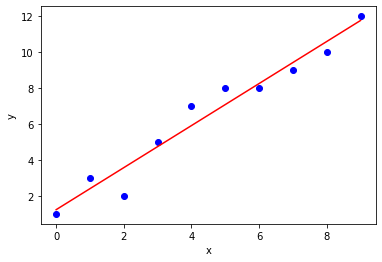

In [72]:
plot_regr_line(x, y, b)

#### Kaggle Dataset

In [73]:
data = pd.read_csv('Salary_Data.csv')
x = data['YearsExperience']
y = data['Salary']

In [74]:
# x = (x_raw - minimum(x_raw))/(maximum(x_raw) - minimum(x_raw))
# y = (y_raw - minimum(y_raw))/(maximum(y_raw) - minimum(y_raw))

In [75]:
b = coeff(x,y)
print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
print(f"Coefficient of Determination: {coeff_of_det(x,y)}")

Estimated coefficients:
 b_0 = 31650.50546021841  
 b_1 = 8990.370514820592
Coefficient of Determination: 1.2678138921682631


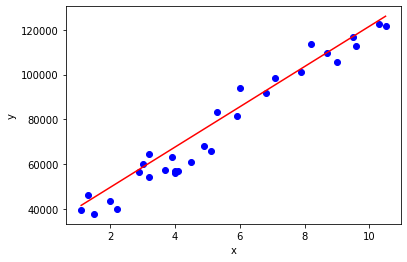

In [76]:
plot_regr_line(x, y, b)

## Using Inbuilt Functions

#### Random Dataset

In [77]:
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape((-1, 1))
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [78]:
model = LinearRegression().fit(x, y)

In [79]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.952538038613988
intercept: 1.2363636363636363
slope: [1.16969697]


#### Kaggle Dataset

In [80]:
data = pd.read_csv('Salary_Data.csv')
x = np.array(data['YearsExperience']).reshape((-1, 1))
y = np.array(data['Salary'])

In [81]:
model = LinearRegression().fit(x, y)

In [82]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9569566641435086
intercept: 25792.200198668696
slope: [9449.96232146]


# 2) Variance inflation factor (VIF)




```
# This is formatted as code
```

## Functions Used

In [83]:
def VIF(x, y):
  R_2 = coeff_of_det(x,y)
  VIF_value = 1 / (1 - R_2)
  return VIF_value

In [84]:
def predicted(x, b0, b1):
  y_pred = b_0 + b_1*x
  return y_pred

In [85]:
def SSR(y_mean, y_pred):
  SSR_value = sum((y_mean - y_pred)**2)
  return SSR_value

In [86]:
def SST(y_mean, y_i):
  SST_value = sum((y_i - y_mean)**2)
  return SST_value

In [87]:
def SSE(y_pred, y_i):
  SSR_value = sum((y_i - y_pred)**2)
  return SSR_value

## Using Manual Calculations

In [88]:
df = pd.DataFrame({'hours': [1, 1, 1, 2, 2, 2, 2, 2, 3, 3,
                             3, 4, 4, 4, 5, 5, 6, 7, 7, 8],
                   'score': [68, 76, 74, 80, 76, 78, 81, 84, 86, 83,
                             88, 85, 89, 94, 93, 94, 96, 89, 92, 97]})

y = df['score'].to_numpy()
x = df['hours'].to_numpy()

In [89]:
y_mean = mean(y)
b_0,b_1 = coeff(x,y)
y_pred = predicted(x, b_0, b_1)
# print(y_pred)

In [90]:
print(f"The SSR for the given model is: {SSR(y_mean, y_pred)}")
print(f"The SST for the given model is: {SST(y_mean, y)}")
print(f"The SSE for the given model is: {SSE(y_pred, y)}")
print(f"The VIF value is: {VIF(x, y)}")

The SSR for the given model is: 908.0
The SST for the given model is: 1239.0
The SSE for the given model is: 322.0
The VIF value is: 3.7712011914828465


# 3) Image Processing (extra)


In [91]:
image = Image.open('gray_img.jpg')
print(image.format)
print(image.size)
print(image.mode)

PNG
(500, 375)
RGBA


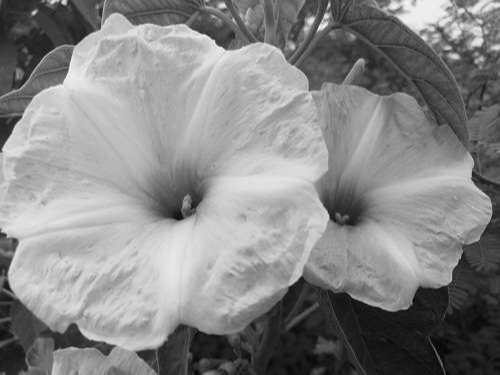

In [92]:
image

In [93]:
numpydata = np.asarray(image)
print(type(numpydata))
print(numpydata.shape)
# print(numpydata)

<class 'numpy.ndarray'>
(375, 500, 4)


In [94]:
noise = np.random.normal(0, .1, numpydata.shape)
new_data = noise + numpydata
# print(new_data)

In [95]:
im = Image.fromarray((new_data * 255).astype(np.uint8))
print(im.mode)
print(im.size)
print(type(im))

RGBA
(500, 375)
<class 'PIL.Image.Image'>


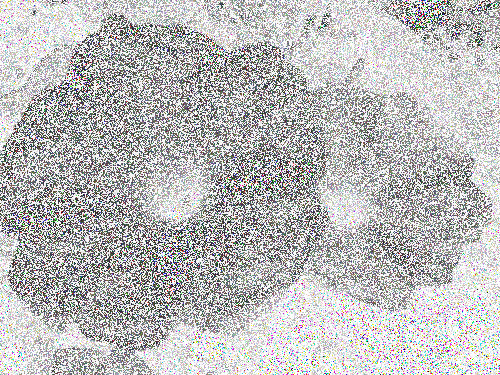

In [96]:
im

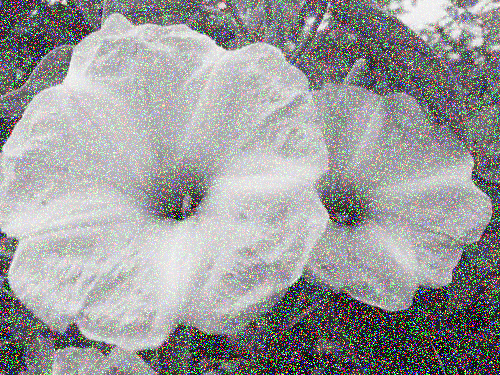

-1

In [97]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)
# cv2.imshow('a',img_gauss)
cv2.waitKey(0)

<class 'numpy.ndarray'>


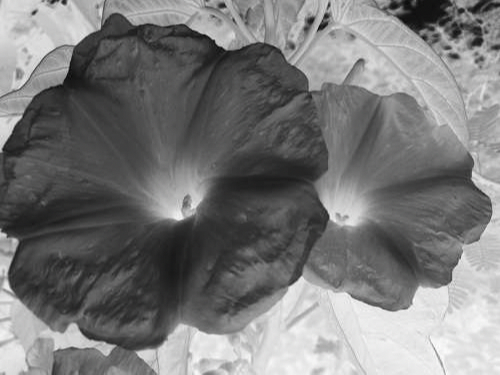

In [98]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')
print(type(img))
numpyData = np.asarray(img)
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
# img_gauss = cv2.add(img,gauss)
newData = gauss + numpyData
# Display the image
im = Image.fromarray((newData * 255).astype(np.uint8))
im
# cv2_imshow(img_gauss)
# cv2.imshow('a',img_gauss)
# cv2.waitKey(0)

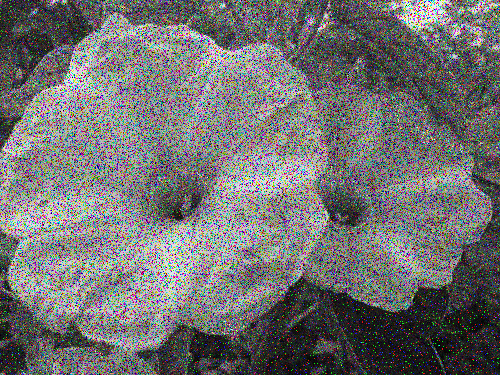

In [99]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

cv2_imshow(noise)
# cv2.waitKey(0)

# 4) Noise and Graph

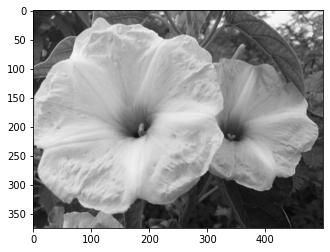

In [100]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('gray_img.jpg')

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')
plt.show()

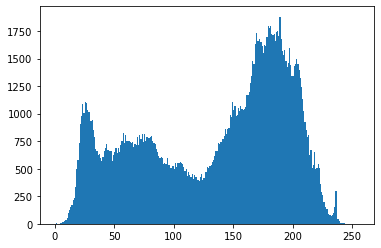

In [101]:
plt.hist(imgGray.ravel(),256,[0,256])
plt.show()

In [102]:
imgGray.shape

(375, 500)

Enter the variance you want to add? 20


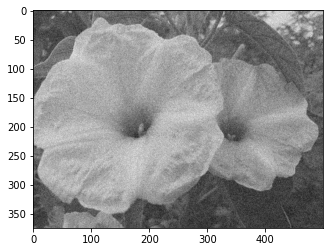

In [103]:
var = int(input("Enter the variance you want to add? "))
noise = np.random.normal(0, var, imgGray.shape)
# print(noise)
new_data = noise + imgGray
plt.imshow(new_data, cmap="gray")

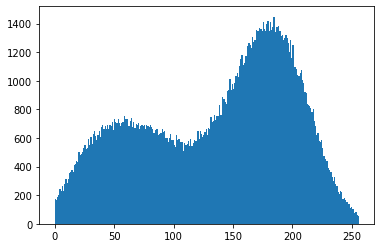

In [104]:
plt.hist(new_data.ravel(),256,[0,256])
plt.show()

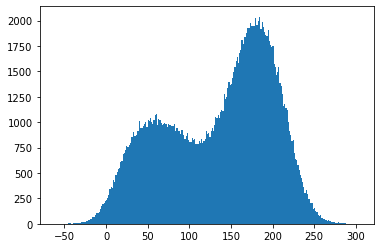

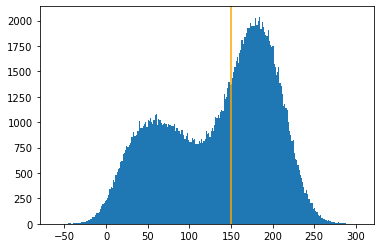

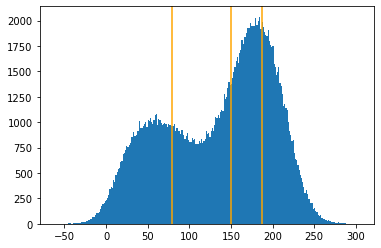

In [105]:
ax = plt.hist(new_data.ravel(), bins=256)
plt.show()
 
approx_median = np.percentile(new_data, 50)
 
ax = plt.hist(new_data.ravel(), bins=256)
plt.axvline(approx_median, color='orange')
plt.show()
 
quartiles = [25, 50, 75]
ax = plt.hist(new_data.ravel(), bins=256)
for q in np.percentile(new_data, quartiles):
    plt.axvline(q, color='orange')
plt.show()

#5) Confusion Matrix

In [106]:
actual = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
predicted = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]

In [107]:
def comp_confmat(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

In [108]:
confusion_matrix = comp_confmat(actual, predicted)
print(confusion_matrix)

[[3. 0. 0. 0. 1.]
 [2. 1. 0. 1. 0.]
 [0. 1. 3. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]]


In [109]:
tot_sum = 0
for i in range(0, len(confusion_matrix)):
  for j in range(0, len(confusion_matrix)): 
    tot_sum += confusion_matrix[i][j]
tot_sum

15.0

In [110]:
# Hence we've a case of multi class classification
def params(mat, n):
  col_sum = [sum([row[i] for row in mat]) for i in range(0,len(mat[0]))]
  row_sum = [sum(mat[i]) for i in range(len(mat))]
  tp = mat[n][n]
  fp = row_sum[n] - tp
  fn = col_sum[n] - tp
  tn = tot_sum - fp - fn - tp
  param = []
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  param.append(accuracy)
  precision = tp / (tp + fp)
  param.append(precision)
  recall = tp / (tp + fn)
  param.append(recall)
  f1_score = (2 * precision * recall) / (precision + recall)
  param.append(f1_score)
  return param

In [111]:
for i in range(len(confusion_matrix)):
  print(f"For the class {i+1}, the values are as follows: ")
  print(f"Accuracy: {params(confusion_matrix,i)[0]}")
  print(f"Precision: {params(confusion_matrix,i)[1]}")
  print(f"Recall: {params(confusion_matrix,i)[2]}")
  print(f"F1-Score: {params(confusion_matrix,i)[3]}")
  print("*********************")

For the class 1, the values are as follows: 
Accuracy: 0.8
Precision: 0.75
Recall: 0.6
F1-Score: 0.6666666666666665
*********************
For the class 2, the values are as follows: 
Accuracy: 0.6
Precision: 0.25
Recall: 0.25
F1-Score: 0.25
*********************
For the class 3, the values are as follows: 
Accuracy: 0.8666666666666667
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
*********************
For the class 4, the values are as follows: 
Accuracy: 0.8666666666666667
Precision: 0.0
Recall: 0.0
F1-Score: nan
*********************
For the class 5, the values are as follows: 
Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1-Score: nan
*********************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


# 6) Multiple Linear Regression

## Using Manual Calculations

In [112]:
data = pd.read_csv('data.csv')
X1 = data['Weight']
X2 = data['Volume']
Y = data['CO2']
N = len(X1)

## Using Sklearn




In [113]:
from sklearn import linear_model

In [114]:
df = pd.read_csv('data.csv')
X = df[['Weight','Volume']]
y = df['CO2']

In [115]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [116]:
print("Intercept: ", regr.intercept_)
print("Coefficients:")
list(zip(x, regr.coef_))

Intercept:  79.69471929115939
Coefficients:


[(1, 0.0075509472703006895), (1, 0.007805257527747124)]

## Using statsmodels.api

In [123]:
import numpy as np
import statsmodels.api as sm

y = [1,2,3,4,3,4,5,4,5,5,4,5,4,5,4,5,6,5,4,5,4,3,4]

x = [
     [4,2,3,4,5,4,5,6,7,4,8,9,8,8,6,6,5,5,5,5,5,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,7,7,7,7,7,6,5],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,7,7,7,7,7,6,6,4,4,4]
     ]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [125]:
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     7.281
Date:                Sun, 11 Sep 2022   Prob (F-statistic):            0.00191
Time:                        15:48:21   Log-Likelihood:                -26.025
No. Observations:                  23   AIC:                             60.05
Df Residuals:                      19   BIC:                             64.59
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2424      0.139      1.739      0.0

# 7) Multivariate Linear Regression

## Using Manual Calculations
